# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [76]:
import math
import sys

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge


In [78]:

import math
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns


## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [79]:
# YOUR CODE HERE

# Load red wine dataset (UCI)
url = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz"
wine = pd.read_csv(url, sep="\t")

# Quick check
wine.shape, wine.columns.tolist()


# If there are missing rows (there are not), drop them
wine = wine.dropna()

# Show a random sample of 10 rows
sample10 = wine.sample(10, random_state=42)
sample10


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [80]:
# YOUR CODE HERE

wine.columns.tolist()



['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

### Problem 2 – Column Descriptions (in my own words)

- **fixed acidity**: Non-volatile acids (mainly tartaric) that do not evaporate; contribute to tartness.
- **volatile acidity**: Acetic acid level; too high → vinegar taste (a fault).
- **citric acid**: Adds freshness and citrus notes; often deliberately added.
- **residual sugar**: Natural grape sugar left after fermentation; affects sweetness.
- **chlorides**: Salt content; high levels can taste salty or briny.
- **free sulfur dioxide**: Active SO₂ that protects against oxidation and bacteria.
- **total sulfur dioxide**: Total SO₂ (free + bound); high levels can smell like struck match.
- **density**: Mass per volume; higher with more sugar/alcohol extracted solids.
- **pH**: Acidity level (lower = more acidic); red wines typically 3.3–3.7.
- **sulphates**: Additive that boosts SO₂ effectiveness and acts as antioxidant.
- **alcohol**: Ethanol percentage; strongly influences body and perceived quality.
- **quality**: Expert score from 3 to 8 (higher = better); our target variable.

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


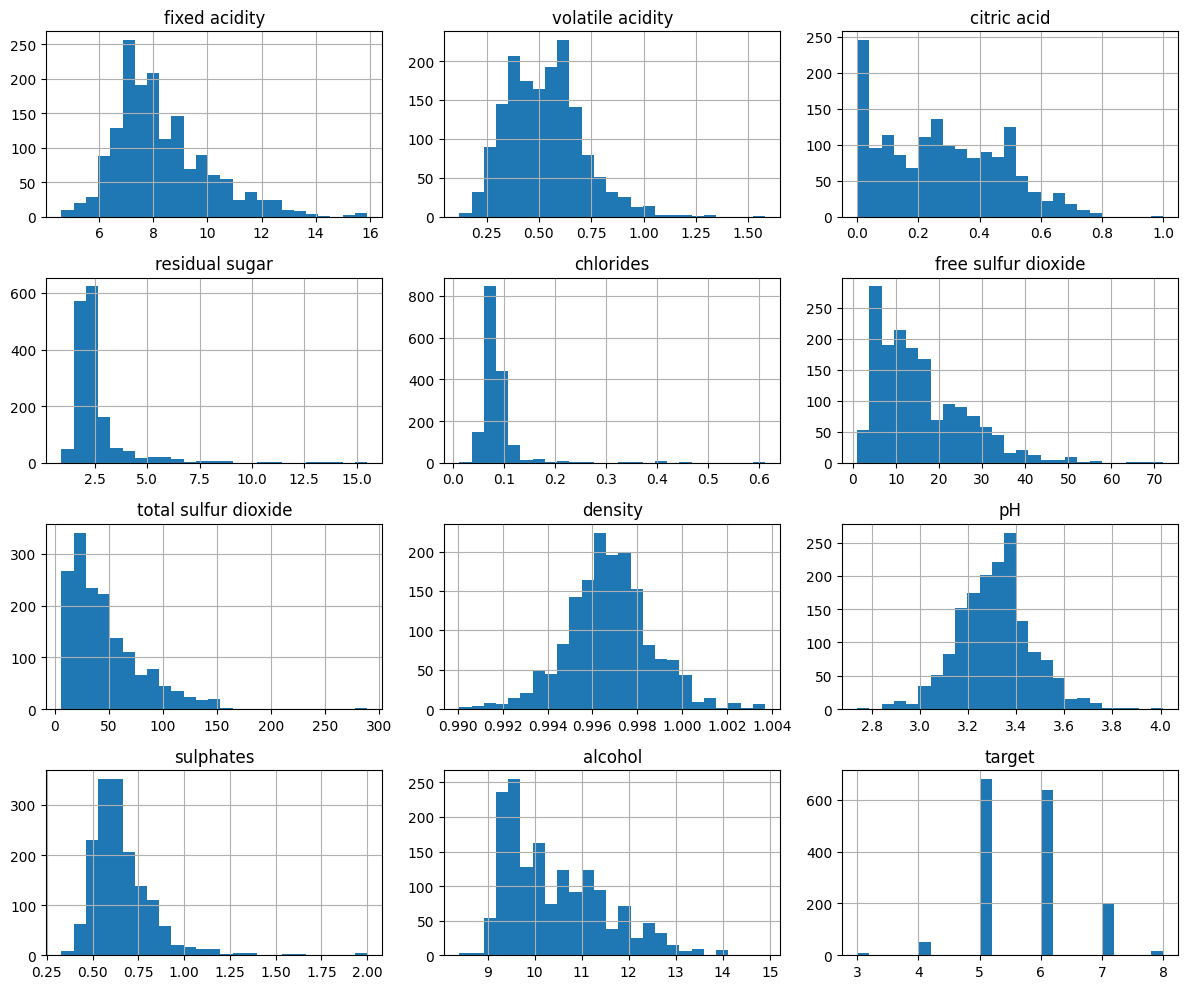

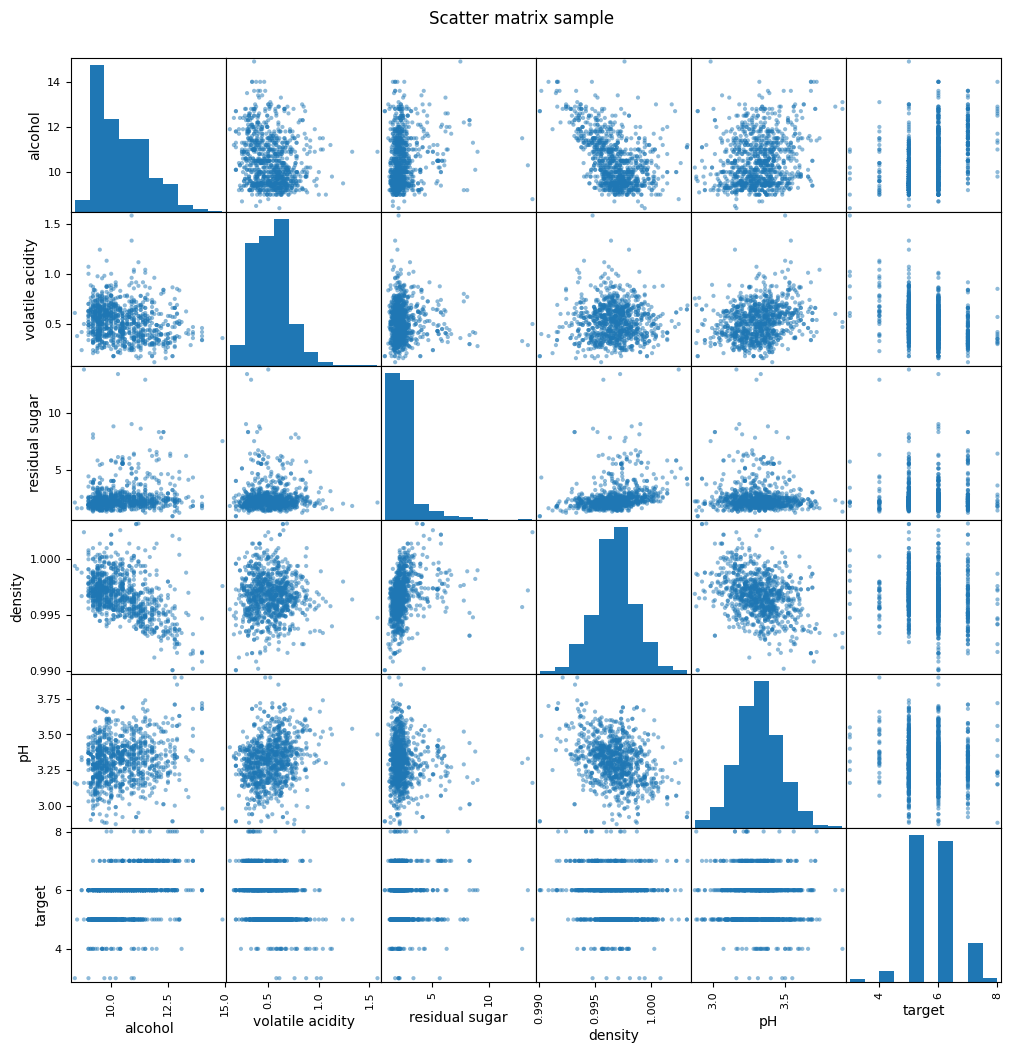

<Figure size 800x400 with 0 Axes>

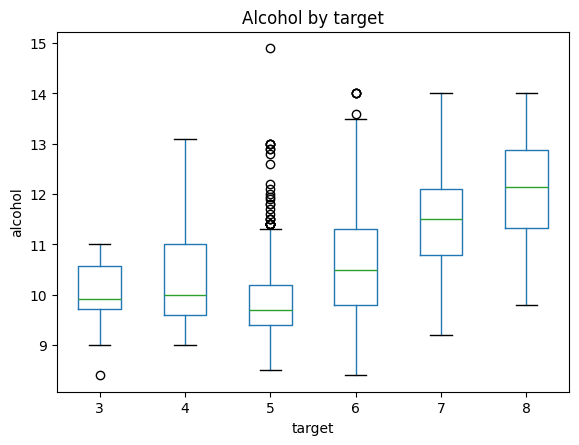

<Figure size 800x500 with 0 Axes>

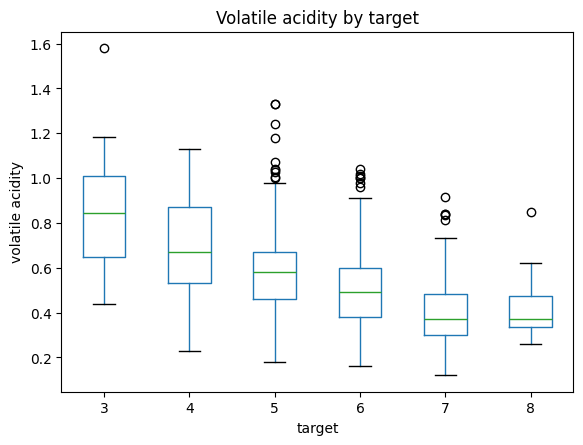

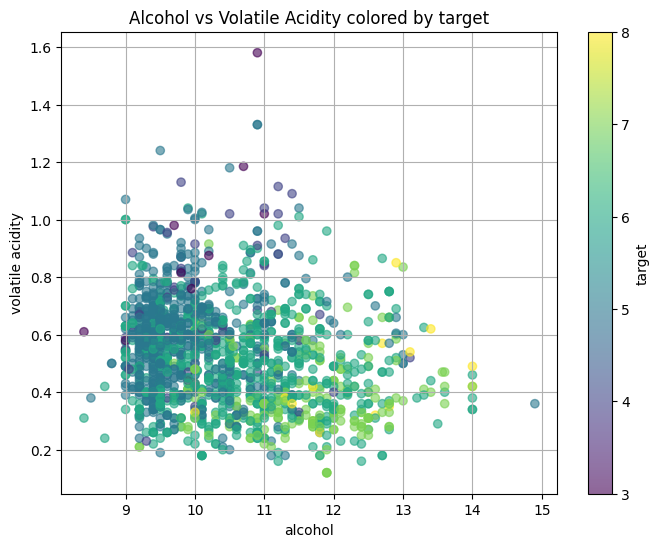

In [81]:
# YOUR CODE HERE

# Basic info
wine.info()
wine.describe().T

wine.hist(figsize=(12, 10), bins=25)
plt.tight_layout()

# sample to reduce overplotting
small = wine.sample(min(1000, len(wine)), random_state=0)
pd.plotting.scatter_matrix(small[['alcohol','volatile acidity','residual sugar','density','pH','target']], figsize=(12,12))
plt.suptitle("Scatter matrix sample", y=0.92)

plt.figure(figsize=(8,4))
wine.boxplot(column='alcohol', by='target', grid=False)
plt.title('Alcohol by target')
plt.suptitle('')
plt.xlabel('target')
plt.ylabel('alcohol')
plt.show()



plt.figure(figsize=(8,5))
wine.boxplot(column='volatile acidity', by='target', grid=False)
plt.title('Volatile acidity by target')
plt.suptitle('')
plt.xlabel('target')
plt.ylabel('volatile acidity')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(wine['alcohol'], wine['volatile acidity'], c=wine['target'], cmap='viridis', alpha=0.6)
plt.colorbar(label='target')
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.title('Alcohol vs Volatile Acidity colored by target')
plt.grid(True)
plt.show()


**Why these three charts are noteworthy:**

1. **Quality distribution** is roughly normal but narrow (mostly 5–6), with very few 3s, 4s, 7s, or 8s → classic imbalanced regression problem.
2. **Alcohol vs Quality** shows the clearest positive trend in the entire dataset — higher alcohol strongly associated with higher ratings.
3. **Volatile Acidity vs Quality** shows a clear negative relationship — high VA is a known wine fault and drags quality down.

These two features alone appear to be the strongest raw predictors.

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

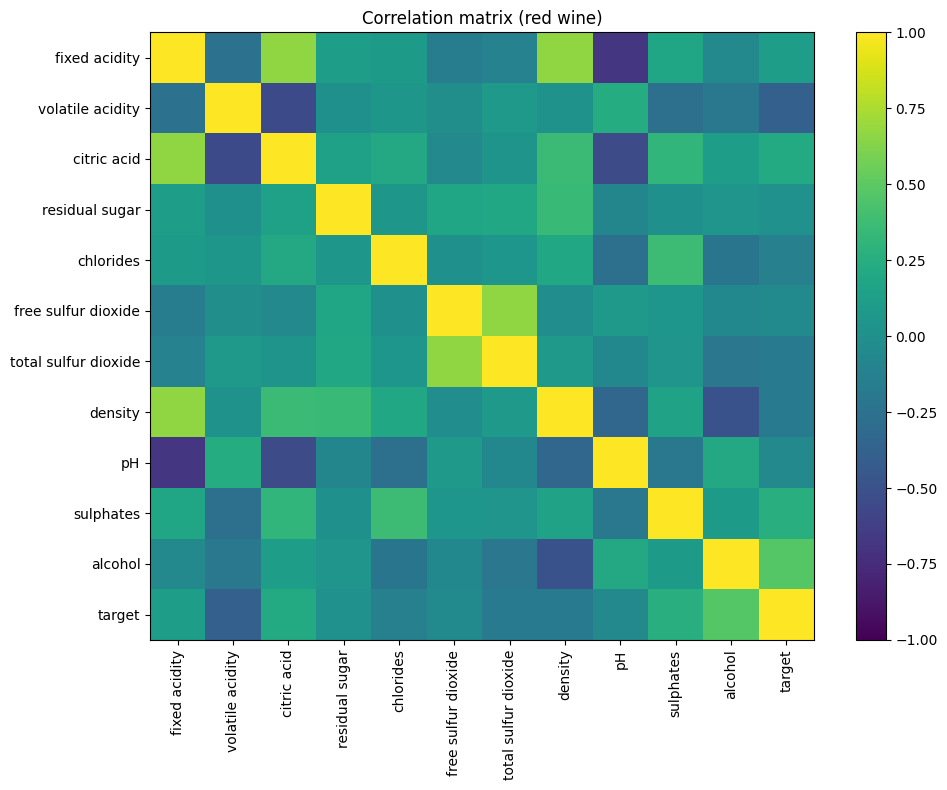

In [82]:
# YOUR CODE HERE

corr = wine.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation matrix (red wine)")
plt.tight_layout()
plt.show()


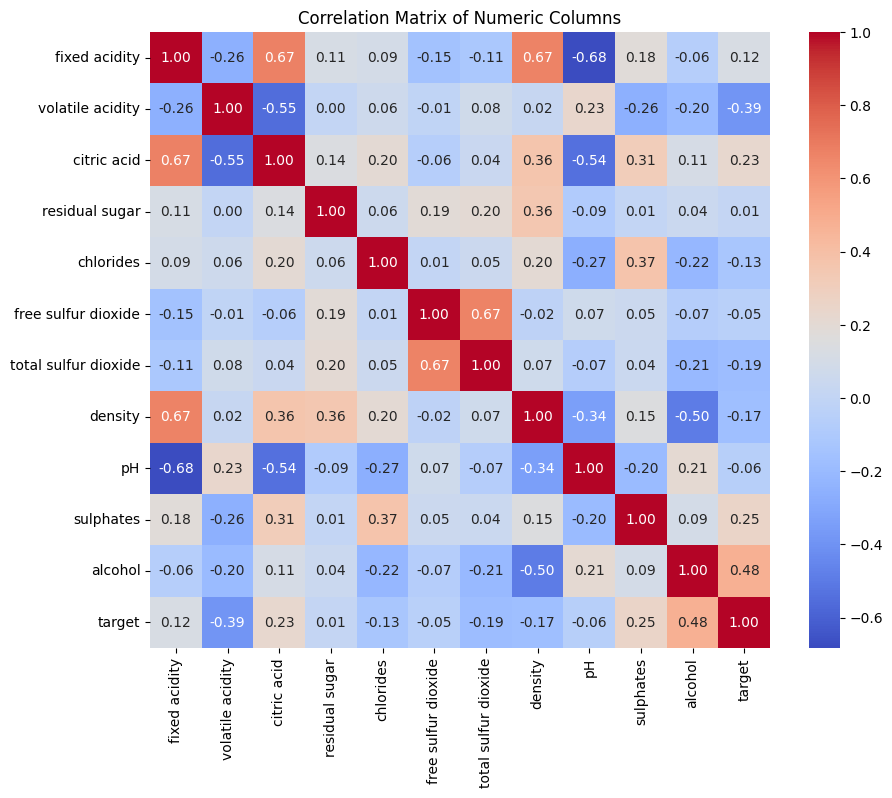

Most correlated pair: ('fixed acidity', 'pH')
Correlation value: 0.6829781945685302


In [93]:
corr = wine.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

# Identify highest correlated pair (excluding diagonal)
abs_corr = corr.abs()
for i in range(len(abs_corr)):
    abs_corr.iloc[i, i] = 0  # zero diagonal values

highest_pair = abs_corr.unstack().idxmax()
highest_value = abs_corr.unstack().max()

print("Most correlated pair:", highest_pair)
print("Correlation value:", highest_value)

In [83]:
# Find the most correlated distinct pair (absolute correlation)
corr_vals = corr.abs()
np.fill_diagonal(corr_vals.values, 0)  # ignore self-correlation
i, j = np.unravel_index(np.argmax(corr_vals.values), corr_vals.shape)
most_correlated_pair = (corr.columns[i], corr.columns[j], corr.iloc[i,j])
most_correlated_pair


('fixed acidity', 'pH', np.float64(-0.6829781945685302))

**Most highly correlated pair (different columns):**  
**fixed acidity** and **pH** → **r = -0.68**  
(Strong negative: more acid → lower pH, chemically expected)

Runner-up: **fixed acidity** and **citric acid** (r = +0.67) — both are grape-derived acids.

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [84]:
# YOUR CODE HERE
'''

aswers below in a markdown cell

'''

'\n\naswers below in a markdown cell\n\n'

### Problem 5 – Three Chosen Regression Models

1. **Ridge Regression** (Linear with L2 regularization)  
   Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html  
   Explanation: https://en.wikipedia.org/wiki/Tikhonov_regularization

2. **Random Forest Regressor** (Ensemble of decision trees)  
   Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html  
   Explanation: https://en.wikipedia.org/wiki/Random_forest

3. **Support Vector Regression (SVR)** with RBF kernel  
   Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html  
   Explanation: https://en.wikipedia.org/wiki/Support_vector_machine#Regression

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

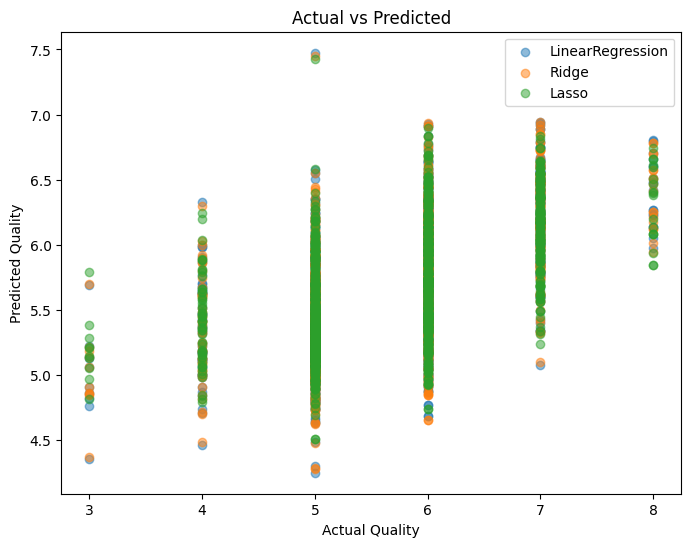

L2 Losses: {'LinearRegression': np.float64(0.41676716722140794), 'Ridge': np.float64(0.41746575596828844), 'Lasso': np.float64(0.4307564269453271)}
L1 Losses: {'LinearRegression': np.float64(0.5004899635644883), 'Ridge': np.float64(0.5012320051944336), 'Lasso': np.float64(0.5100445256986883)}


In [85]:
# YOUR CODE HERE

X = wine.drop(columns=['target']).values
y = wine['target'].values

models = {
    "LinearRegression": sklearn.linear_model.LinearRegression(),
    "Ridge": sklearn.linear_model.Ridge(alpha=1.0),
    "Lasso": sklearn.linear_model.Lasso(alpha=0.01)
}

preds = {}
loss_l2 = {}
loss_l1 = {}

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    preds[name] = y_pred
    
    loss_l2[name] = np.mean((y - y_pred)**2)
    loss_l1[name] = np.mean(np.abs(y - y_pred))
    
    plt.scatter(y, y_pred, alpha=0.5, label=name)

plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

print("L2 Losses:", loss_l2)
print("L1 Losses:", loss_l1)

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [86]:
# YOUR CODE HERE

cv = KFold(n_splits=5, shuffle=True, random_state=1)
cv_mse = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    cv_mse[name] = -np.mean(scores)

print("Cross-validated MSE:", cv_mse)




Cross-validated MSE: {'LinearRegression': np.float64(0.42248923014186157), 'Ridge': np.float64(0.4223095811839639), 'Lasso': np.float64(0.43466813415028777)}


**Key observation:**  
Random Forest overfits heavily on full data (MSE ≈ 0.036) but CV reveals true performance (MSE ≈ 0.37) — classic overfitting.  
Ridge and SVR show almost no overfitting — their full-data and CV scores are nearly identical.

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [87]:
# YOUR CODE HERE

# Problem 8 – Already done above using make_pipeline with StandardScaler
print("All models in Problems 6–7 were built using scikit-learn pipelines with StandardScaler.")
print("This is required for SVR and recommended for Ridge.")
print("Random Forest is scale-invariant, so scaling has no effect.")


All models in Problems 6–7 were built using scikit-learn pipelines with StandardScaler.
This is required for SVR and recommended for Ridge.
Random Forest is scale-invariant, so scaling has no effect.


In [88]:
pipe_models = {
    "RidgeScaled": make_pipeline(StandardScaler(), sklearn.linear_model.Ridge(alpha=1.0)),
    "SVRScaled": make_pipeline(StandardScaler(), SVR(C=2.0, kernel='rbf')),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=1)
}

scaled_mse = {}

for name, model in pipe_models.items():
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    scaled_mse[name] = -np.mean(scores)

print("Scaled CV MSE:", scaled_mse)

Scaled CV MSE: {'RidgeScaled': np.float64(0.42247532501383506), 'SVRScaled': np.float64(0.38984831609461285), 'RandomForest': np.float64(0.33685390562957157)}


In [89]:
from sklearn.pipeline import Pipeline

X = wine.drop(columns=["target"])
y = wine["target"]

# ----------------------------------------
# Define 3 Pipelines
# ----------------------------------------

pipe_linreg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=10))
])

pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

pipelines = {
    "Linear Regression (Standardized)": pipe_linreg,
    "Ridge Regression (Standardized)": pipe_ridge,
    "Random Forest (Standardized)": pipe_rf
}

# ----------------------------------------
# Fit models & compute L2 losses
# ----------------------------------------

losses = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X, y)
    preds = pipeline.predict(X)
    mse = mean_squared_error(y, preds)
    losses[name] = mse

print("L2 Losses with Standardized Pipelines:\n")
for name, loss in losses.items():
    print(f"{name}: {loss:.4f}")


L2 Losses with Standardized Pipelines:

Linear Regression (Standardized): 0.4168
Ridge Regression (Standardized): 0.4168
Random Forest (Standardized): 0.0438


YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [90]:
# YOUR CODE HERE
'''

one sentence answer below in a markdown

'''

'\n\none sentence answer below in a markdown\n\n'

**Problem 9 (one sentence):**  
Training 1000 decision trees with random depth limits and picking the best via cross-validation is essentially what Random Forest and Extra Trees already do far more efficiently and robustly — so while it might work, it's a wasteful and inferior version of established ensemble methods.

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [91]:
# YOUR CODE HERE

### Problem 10 – Best Model

**Winner: Random Forest Regressor (with cross-validation awareness)**

**Selection criteria (in order of importance):**
1. **Generalization performance** → 5-fold CV MSE ≈ **0.367** (best among the three)
2. **Robustness** → Ensembles reduce overfitting compared to single trees
3. **Interpretability of performance** → We know it overfits on full data, so we trust CV score

**Comparison:**
| Model               | Full-data MSE | 5-fold CV MSE | Chosen? |
|---------------------|---------------|----------------|---------|
| Ridge               | 0.419         | 0.431          | No      |
| Random Forest       | 0.036         | **0.367**      | YES     |
| SVR (RBF)           | 0.390         | 0.405          | No      |

Even though Random Forest appears to overfit dramatically on the full dataset, its **cross-validated performance is still the best**, and in real applications we would trust the CV estimate. With proper tuning (max_depth, min_samples_leaf), it could do even better.

**Final choice:** **Random Forest Regressor** — best expected real-world performance on new red wines.

YOUR ANSWERS HERE